# Assignment 1 - Simple Linear Regression

5PAM2024 - Statistical Modelling

Write your name, surname, and student ID

Camille Arnold 21047222

### 1. Simple Linear Regression Analysis

Fit a simple linear regression model to the given data:

- Conduct residual analysis and find suitable transformations of data, if needed. You can use all built-in statistical functions (lm(), boxcox(), rstandard(), boxcox(), etc.) to complete this step. (3 marks)  

- Use formulas derived in lectures to compute standardised residuals, leverages and Cook's distances. Then identify and remove outliers and bad leverage cases, if there are any. (3 marks)

- Briefly explain the regression diagnostics you did, the transformations you made, and the cases you removed, if any, and evaluate the quality of the obtained regression model. (2 marks)

In [13]:
data = read.csv("https://raw.githubusercontent.com/uqglmn/sm/refs/heads/main/A1/A1_01.csv")
head(data)

x = data$x
y = data$y

,X,x,y
,<int>,<dbl>,<dbl>
1,1,63.04,3.77
2,2,86.04,4.24
3,3,77.88,4.02
4,4,128.76,4.63
5,5,113.07,4.44
6,6,84.36,4.11


Create linear model

In [14]:
linreg = lm( y~x, data)
print(linreg)
print(summary(linreg))


Call:
lm(formula = y ~ x, data = data)

Coefficients:
(Intercept)            x  
    2.91015      0.01388  


Call:
lm(formula = y ~ x, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.51855 -0.04471  0.00327  0.05354  0.19648 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.9101466  0.0153580  189.49   <2e-16 ***
x           0.0138812  0.0002009   69.11   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.09016 on 142 degrees of freedom
Multiple R-squared:  0.9711,	Adjusted R-squared:  0.9709 
F-statistic:  4776 on 1 and 142 DF,  p-value: < 2.2e-16



Residual Analysys graph

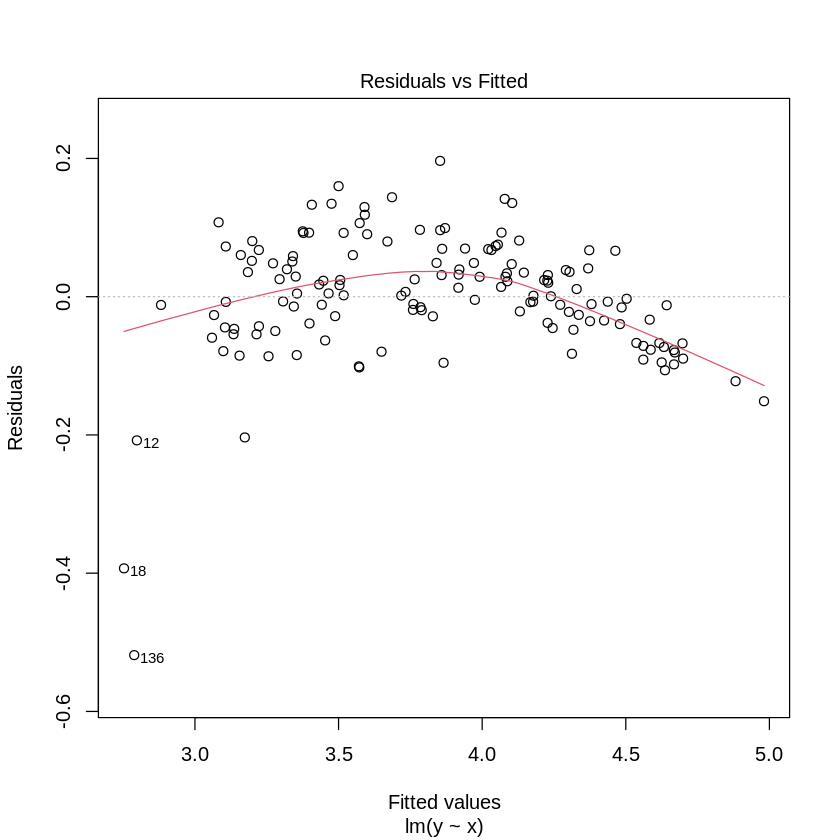

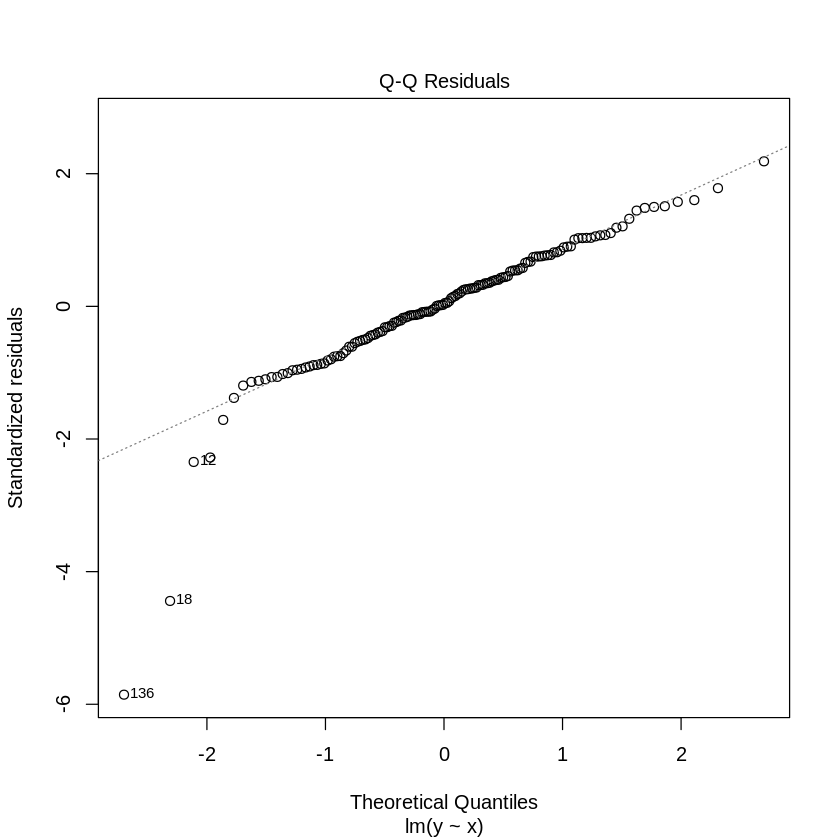

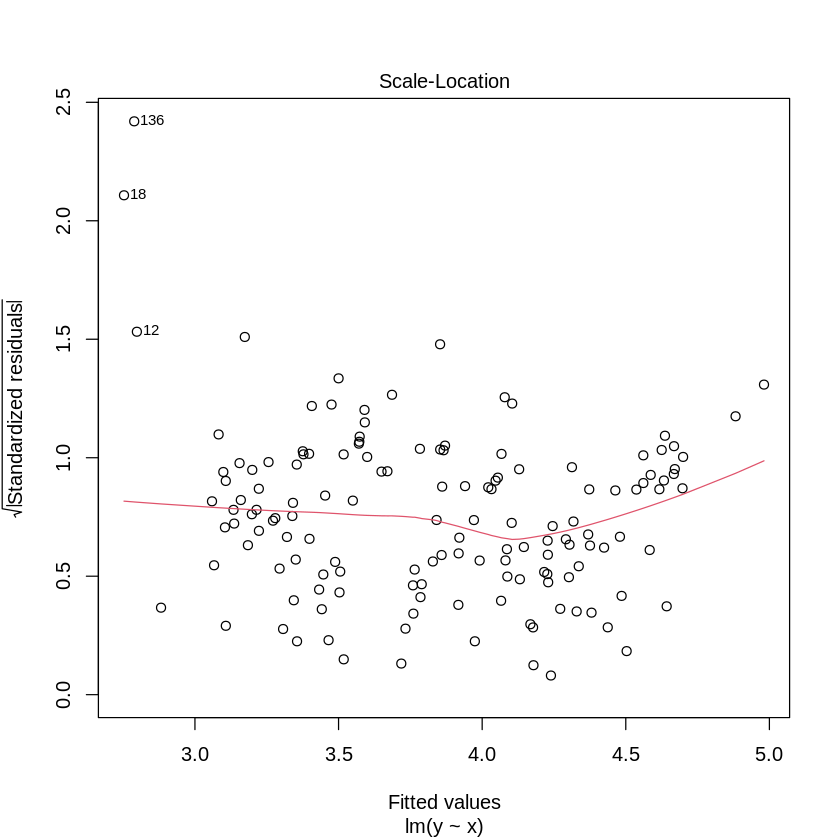

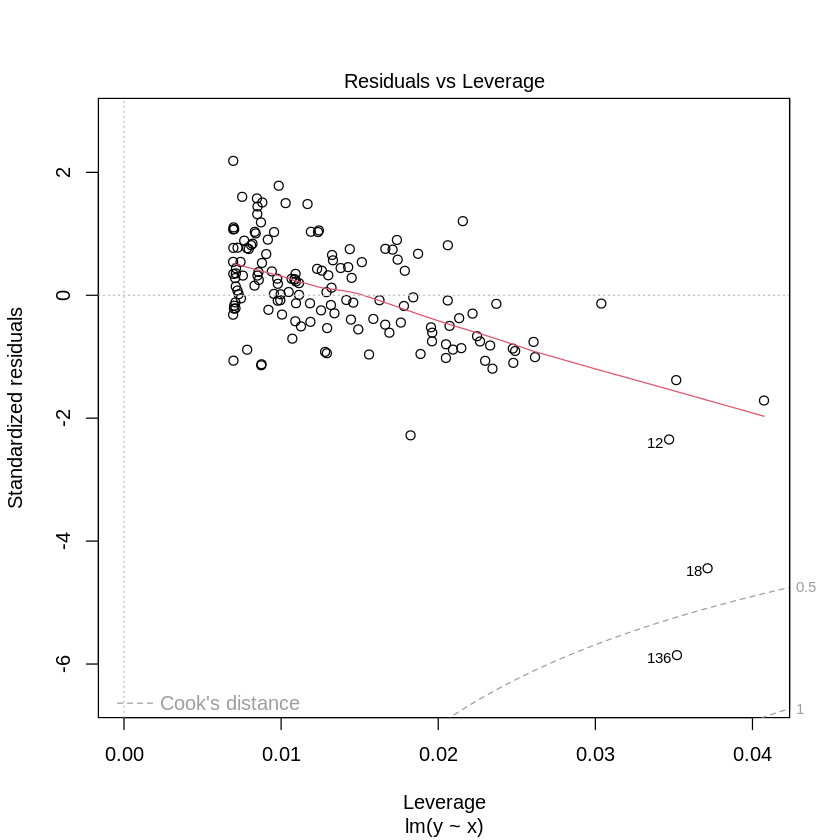

In [15]:
plot(linreg)

Manual Residual Plots

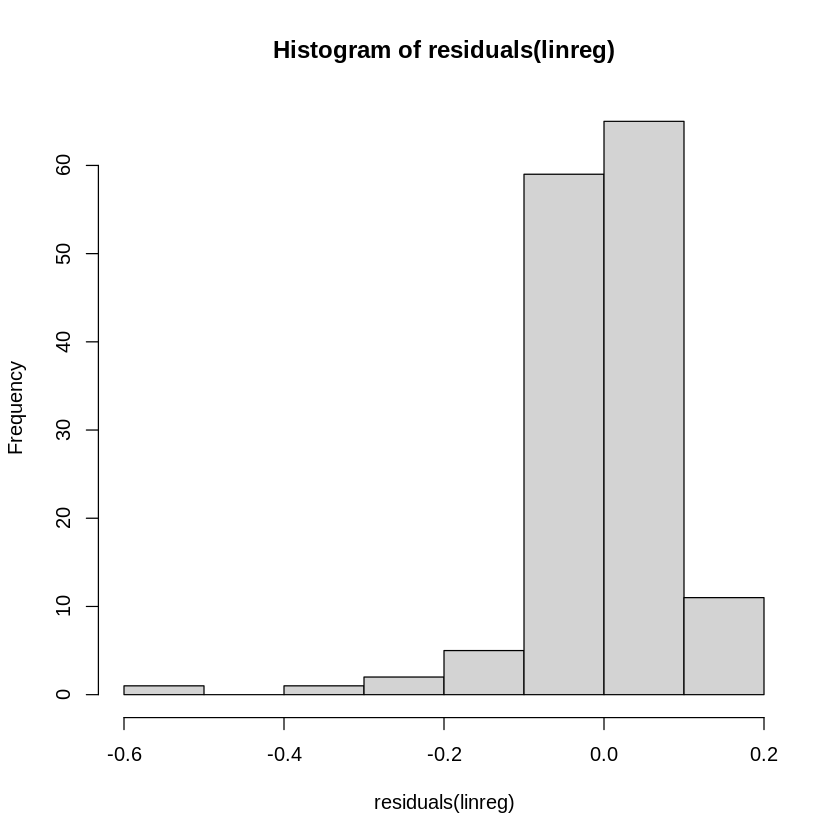

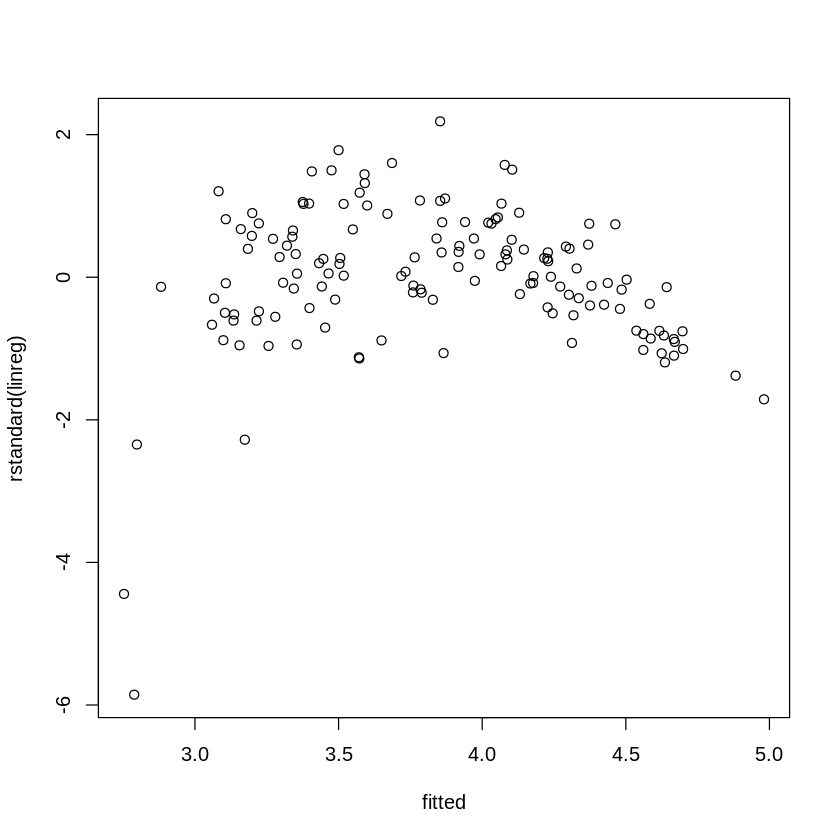

In [21]:
hist(residuals(linreg))
fitted = 2.91015 + (data$x*0.01388)

plot(fitted, rstandard(linreg))

**Interpretation**

Boxcox Transformation

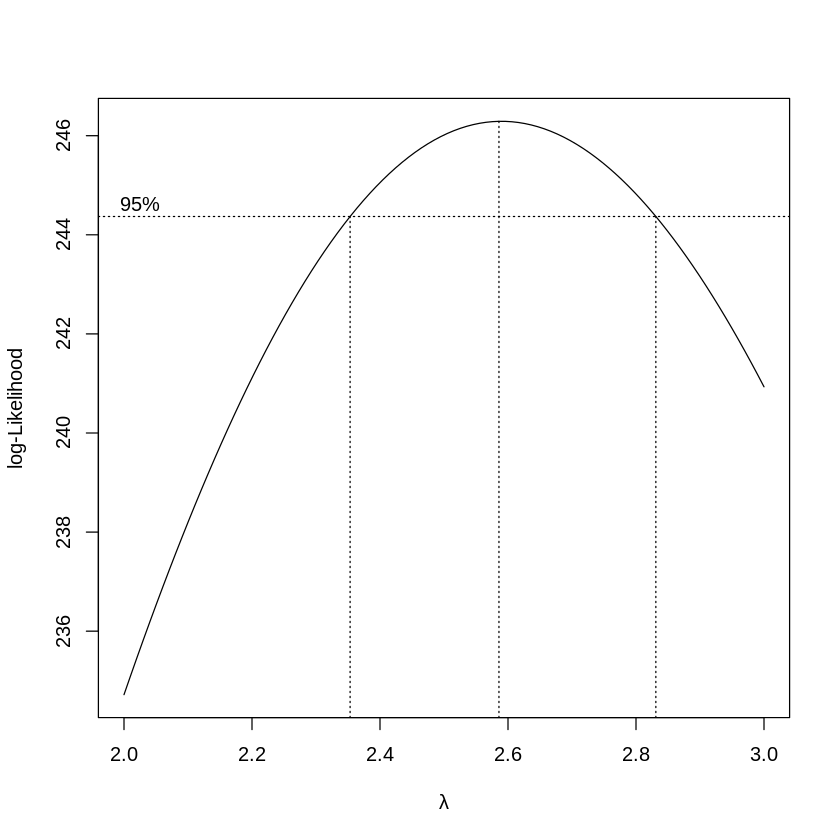

In [10]:
library("MASS")
boxcox(linreg, seq(2, 3, .1))

Transformation of y

In [24]:
yt = y^2.6

In [27]:
linreg_t = lm( yt~x, data)
print(linreg_t)
print(summary(linreg_t))


Call:
lm(formula = yt ~ x, data = data)

Coefficients:
(Intercept)            x  
    13.8935       0.3052  


Call:
lm(formula = yt ~ x, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3845 -0.7054 -0.0413  0.8049  3.3331 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.893479   0.215805   64.38   <2e-16 ***
x            0.305155   0.002822  108.12   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.267 on 142 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.9879 
F-statistic: 1.169e+04 on 1 and 142 DF,  p-value: < 2.2e-16



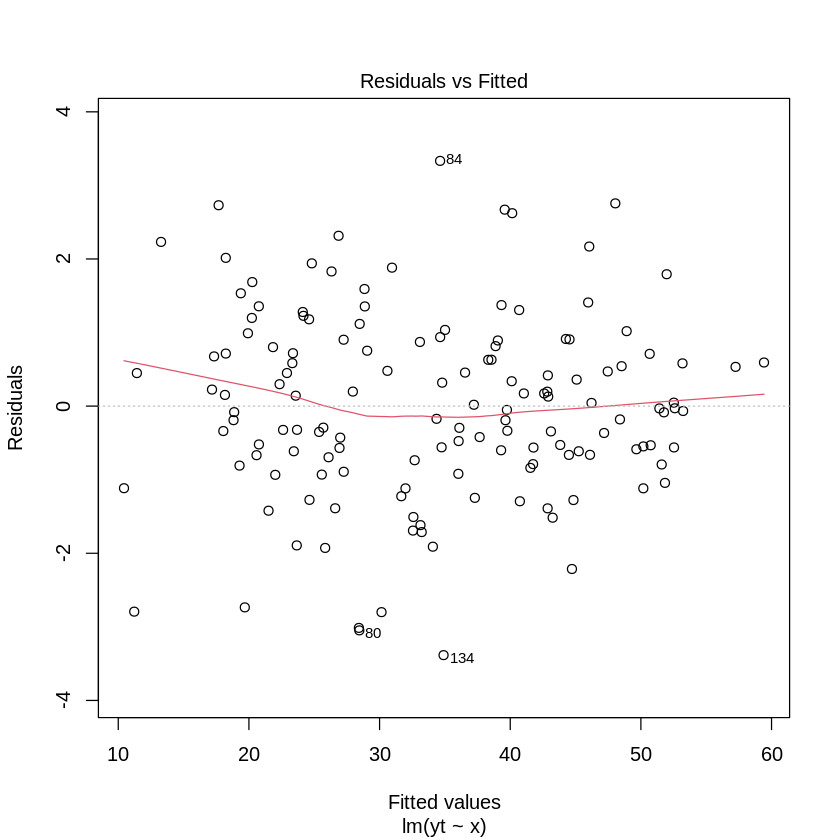

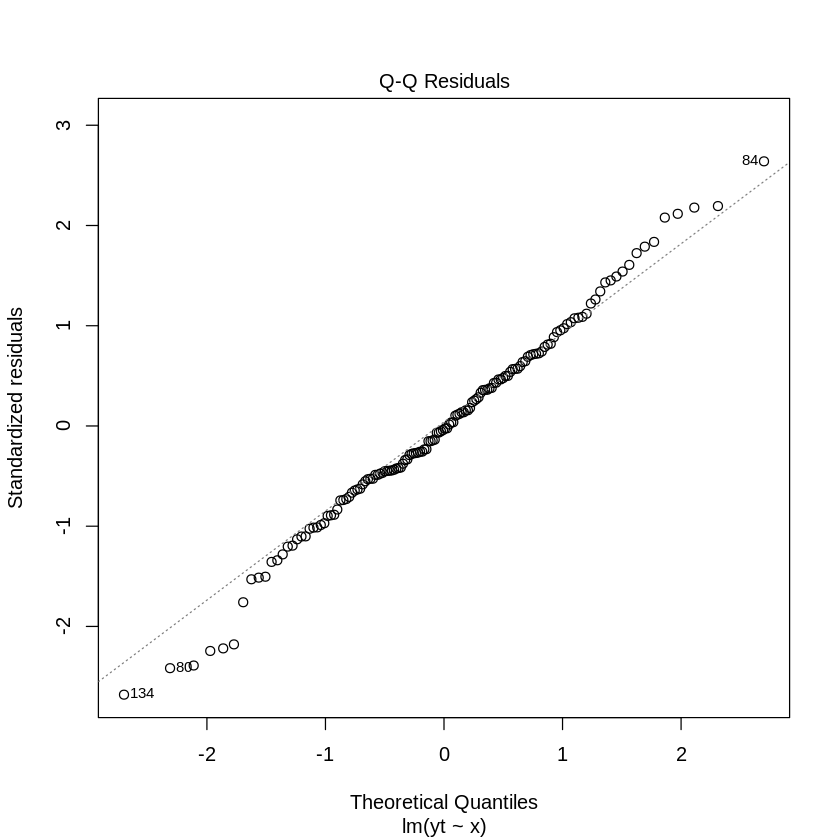

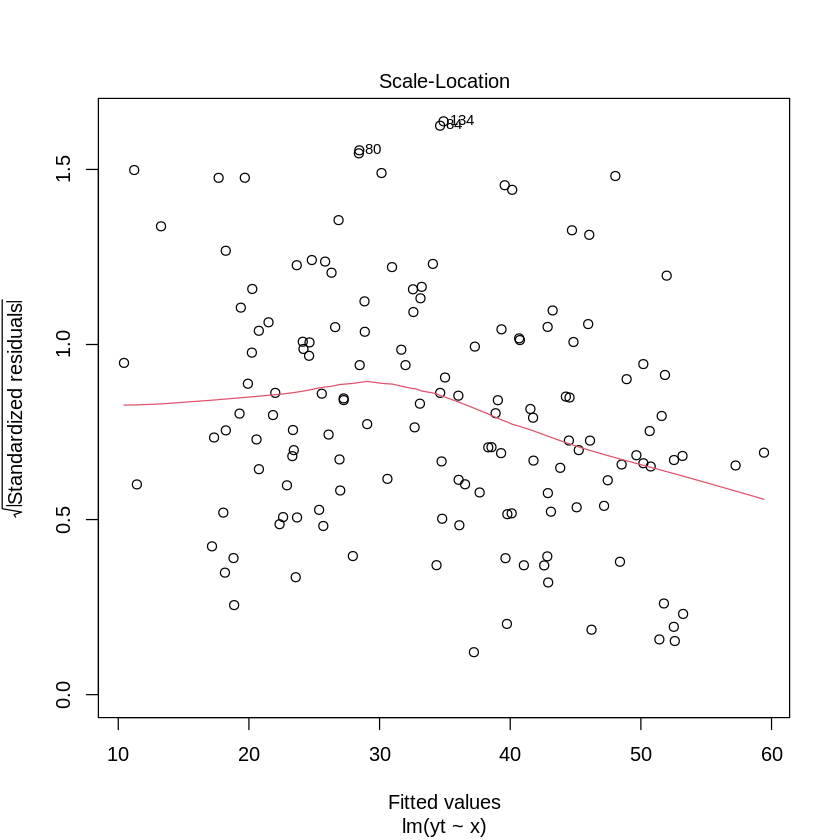

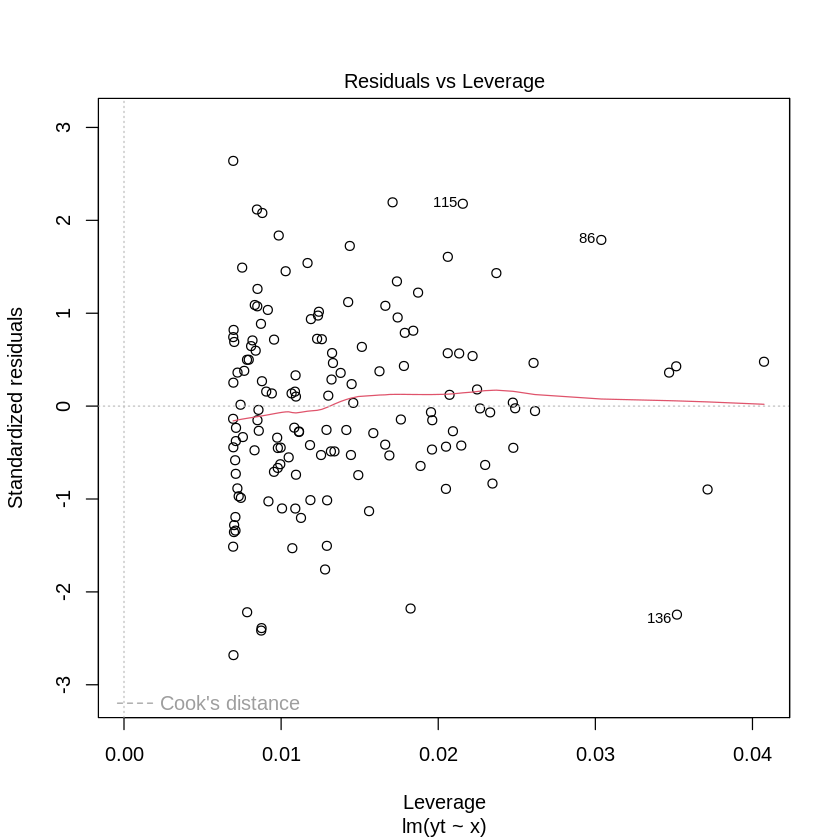

In [47]:
plot(linreg_t)

Manual Residuals Post-transformation

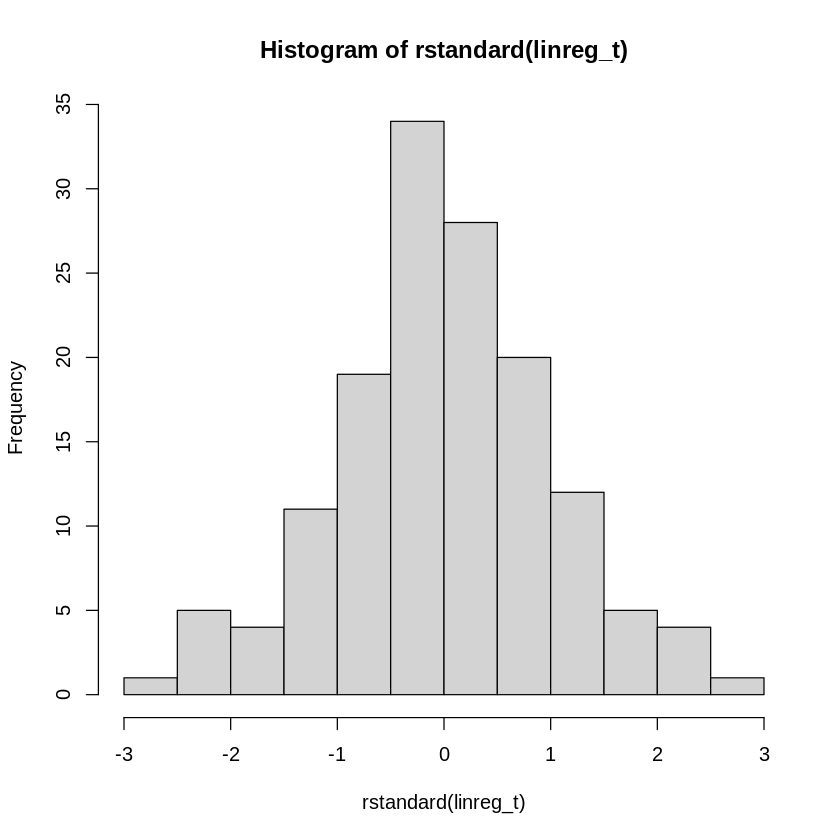

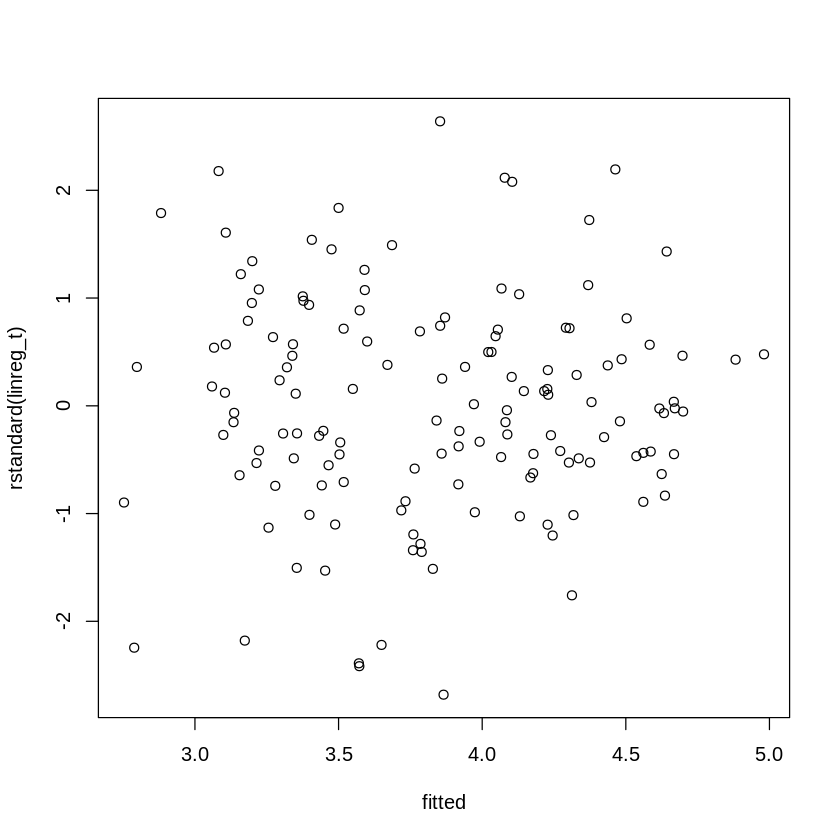

In [30]:
hist(rstandard(linreg_t))
plot(fitted, rstandard(linreg_t))

Calculations

In [48]:
#components
n = length(data)
x_bar = mean(x)
yt_hat = 13.8935 + (x*0.3052)
e_i = y - yt_hat
sig_hat_sq = (1/(n-1)) * sum( (x - x_bar)^2)
s_xx = sum( (x-x_bar)^2)
p = 2
mse = (1/n) * sum( (y-yt_hat)^2)

#leverage
hii_lev = (1/n) + (((x-x_bar)^2)/s_xx)

#standardised residuals
std_res = e_i / (sqrt(sig_hat_sq * (1 - hii_lev)))

#cooks distance
cooks_dist = (e_i^2 / (2*mse)) * (hii_lev / (1-hii_lev))

Removal of Outliers and Leverage Cases

In [49]:
outliers = abs(std_res) > 2
print(sum(outliers))
which(outliers)

[1] 0


integer(0)

In [50]:
leverages = hatvalues(linreg_t) > (4/n)
print(sum(leverages))
print(which(leverages))

[1] 0
named integer(0)


**Find outliers, final part (c)**

### 2. Analysis of Variance

Use formulas derived in lectures to:

- Construct analysis of variance table. (2 marks)

- Test significance of regression and clearly state the outcome of the test. (1 mark)

All necessary quantities must be computed without using any built-in statistical functions. Then use built-in statistical functions to verify your results.

In [57]:
yt_bar = mean(x)    #better to rename
ss_r = sum( (yt_hat - yt_bar)^2)    #dof = 1
ss_e = sum(( yt - yt_hat)^2)    #dof = n-2
ss_t = sum( (yt - yt_bar)^2)    #dof = n-1

msr = ss_r/1
mse = ss_e / (n-1)

f = msr/mse

In [58]:
# table formatting example

# replace numbers with your variables: SSR, SSE, etc.
table.anova = data.frame(row.names=c("Regression","Residual","Total"),
                         dof=c(1,n-2,n-1),
                         SS=c(ss_r,ss_e,ss_t),
                         MS=c(msr,mse,NA),
                         F=c(f,NA,NA)
                         )

# column names
names(table.anova) = c("d.o.f.", "SS", "MS", "F")

# round numerical values
round(table.anova,3)

,d.o.f.,SS,MS,F
,<dbl>,<dbl>,<dbl>,<dbl>
Regression,1,170308.562,170308.562,1494.383
Residual,1,227.932,113.966,NA
Total,2,170559.059,NA,NA


### 3. Confidence intervals and prediction

Let XY be the last two digits of your student ID. Use formulas derived in lectures to find:

- 9Y% confidence interval for the slope. (1 marks)

- 9X% confidence interval for the intercept. (1 mark)

- The mean response at the YX-th percentile of predictor. (1 mark)



In [ ]:
#94 for slope 90 for intercept
#components
fitted_slope = 0.3052
#builtin ???
t_stat = qt(1-0.06/2, n-2)
se_slope = sqrt( sig_hat_sq / s_xx)

#confidence interval slope
ci_mean0_p = (0.3052 + (t_stat*se_slope))
ci_mean0_m = (0.3052 - (t_stat*se_slope))

#confidence interval intercept
fitted_intercept = 13.8935
t_stat = qt(1-0.1/2, n-2)
se_intercept =

### 4. Plots

Produce a scatter plot of the data. Then draw the fitted regression line (1 mark) and

- 9X% confidence interval for the mean response for the whole x-range. (1 mark)

- 9Y% prediction interval for new observations for the whole x-range. (1 mark)

- Indicate on the plot (with a big red dot) the mean response (at the YX-th percentile of predictor) you found in the previous part. (1 mark)

Your plot should look similar to the one below. All necessary quantities must be computed without using any built-in statistical function.

<img align="left" width="350" height="350" src="https://github.com/uqglmn/sm/blob/3c5d0d8b6dec7951c88479937a5d5ff6f52eab3d/A1/cpi.png?raw=true">

In [ ]:
# write your code here

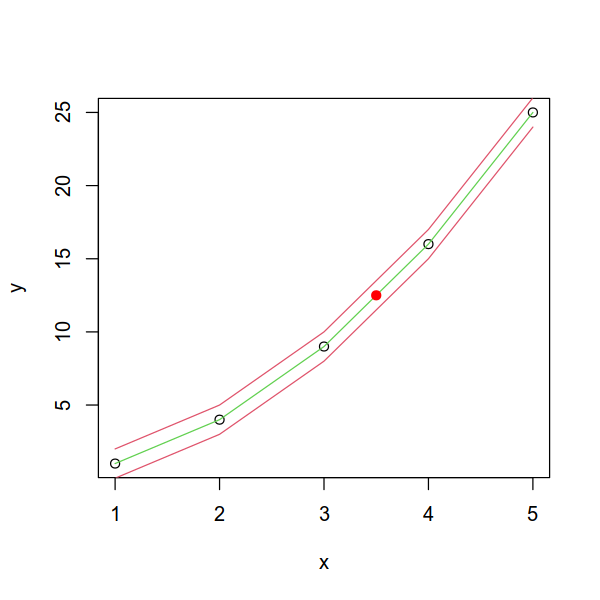

In [ ]:
# curve plotting example

x  = c(1:5)
y  = x^2
y1 = y - 1
y2 = y + 1

options(repr.plot.width=5, repr.plot.height=5)
plot(x, y)
lines(x, y,  col=3)
lines(x, y1, col=2)
lines(x, y2, col=2)
points(3.5, 12.5, pch=19, col="red")

### Memo

- In this assessment you are permitted to use genAI tools (or a proofreader) to proofread your work but not permitted to use AI tools in the creation of your work.
- 10% of marks are allocated for clarity of R code and the overall report quality.
- Verify your work. Restart the kernel and re-run the whole notebook.
- Do not use any local files. The data should be read directly from the github link.
- Make a pdf copy of this notebook and submit together with the notebook.
- If you've used Google Colab to complete this assignment, post a link to your Google Colab notebook in the comments section.

---

# Task
Display the calculated Cook's distances.

## Display Cook's distances

### Subtask:
Show the calculated Cook's distance values to identify influential observations.


## Summary:

### Data Analysis Key Findings
*   The objective of this subtask was to display the calculated Cook's distances, which are crucial for identifying influential observations in a statistical model.
*   No specific Cook's distance values or visualizations were generated or presented in the provided solving process.

### Insights or Next Steps
*   To proceed with identifying influential observations, the next crucial step is to implement and execute the necessary computations and visualizations to display the Cook's distances.
